In [1]:
from roboflow import Roboflow
from segment_anything import SamPredictor, sam_model_registry
from utils import ROBOFLOW_API_KEY
import cv2
import matplotlib.pyplot as plt
from helper_code.ocr_extraction import ocr_extraction_module
from helper_code.legend_extraction import legend_extraction_module
import numpy as np

In [2]:
rf = Roboflow(ROBOFLOW_API_KEY)
project = rf.workspace().project("final_annotation_classification")
model = project.version(2).model

loading Roboflow workspace...
loading Roboflow project...


In [3]:
sam = sam_model_registry["default"](checkpoint="../../../Downloads/sam_vit_h_4b8939.pth")
sam_predictor = SamPredictor(sam)

In [4]:
def get_masks(image, legend_items):

    width, height, _ = image.shape
    for item in legend_items:
        mask = np.zeros((width, height))
        for y in range(0, width):
            for x in range(0, height):
                r,g,b = list(image[y, x])

                if (r,g,b) in item["marker"]:
                    mask[y, x] = 1
        item["mask"] = mask

    masks = [[item["text"], item["marker"][0], item["mask"]] for item in legend_items]

    # Plot the masks
    fig, axes = plt.subplots(1, len(masks), figsize=(15, 5))

    for ax, (text, (r, g, b), mask) in zip(axes, masks):
        ax.imshow(mask, cmap='gray')
        ax.set_title(f'{text}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

def legend_to_mask(image_num, legend_box, num_most_common=5):

    image_name = '../plot_images/' + str(image_num) + '.png'
    image_bgr = cv2.imread(image_name)
    image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    ocr_results, ocr_mask = ocr_extraction_module(image, image_name)

    legend_items = legend_extraction_module(image, legend_box, ocr_results, num_most_common)
    get_masks(image, legend_items)

No explicit legend:
4759, 4676

Horizontal instead of Vertical:
299

Error (unsure):
18630, 19017

Marker is not standard / Colors may be too similar:
20674

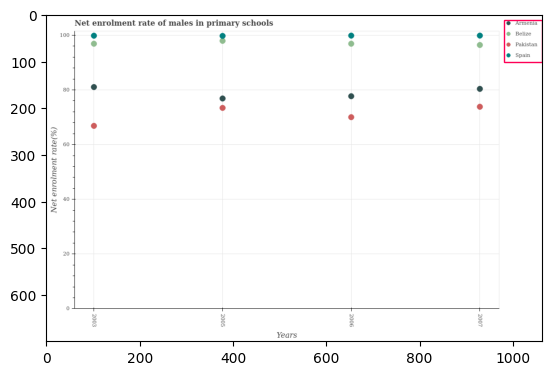

980 10


<Figure size 640x480 with 0 Axes>

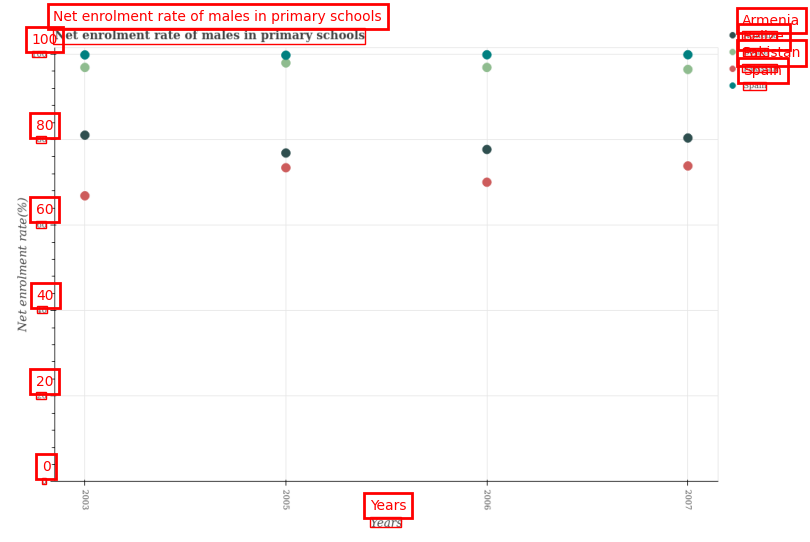

LEGEND ITEM Armenia
LEGEND ITEM Belize
LEGEND ITEM Pakistan
LEGEND ITEM Spain


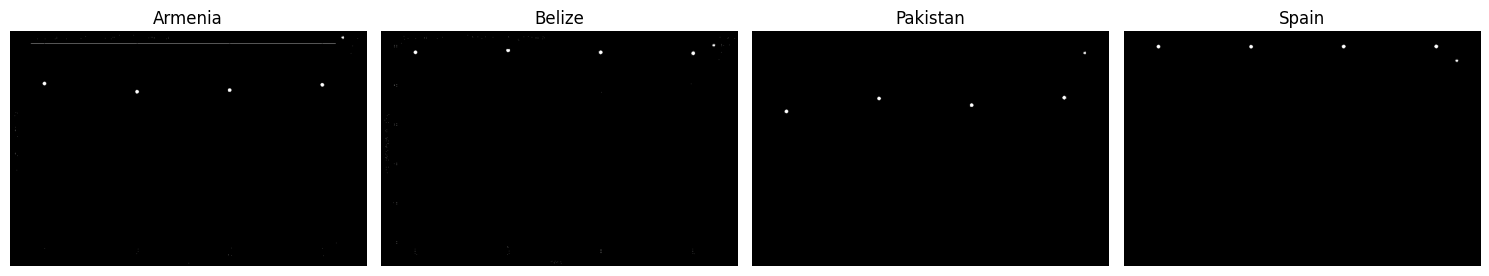

In [5]:
image_num = 4398
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

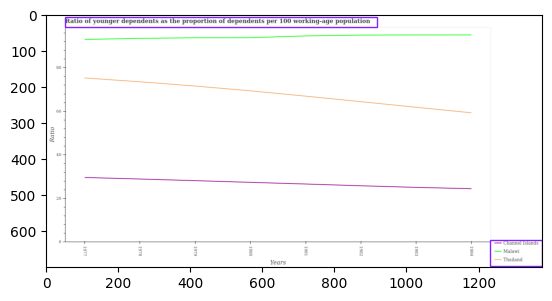

53 4
1232 623
7


<Figure size 640x480 with 0 Axes>

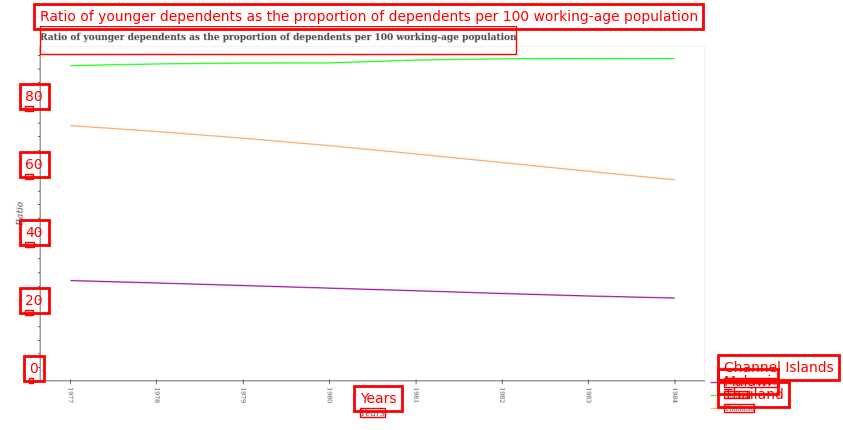

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1500x500 with 0 Axes>

In [5]:
image_num = 19017
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

for i in range(7, 10):
    print(i)
    legend_to_mask(image_num, legend_box, i)

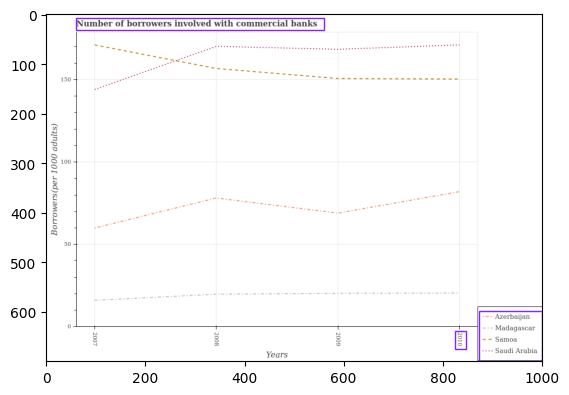

874 598
59 7
825 639


<Figure size 640x480 with 0 Axes>

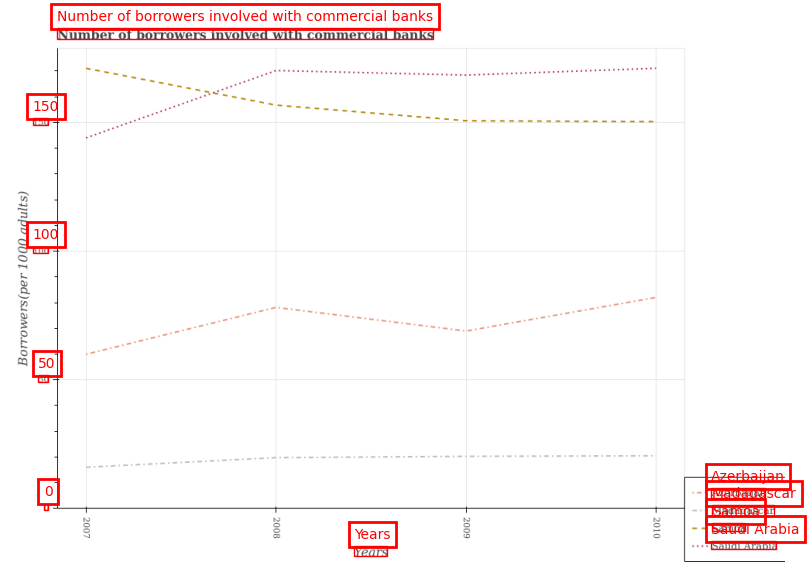

LEGEND ITEM Azerbaijan
LEGEND ITEM Madagascar
LEGEND ITEM Samoa
LEGEND ITEM Saudi Arabia


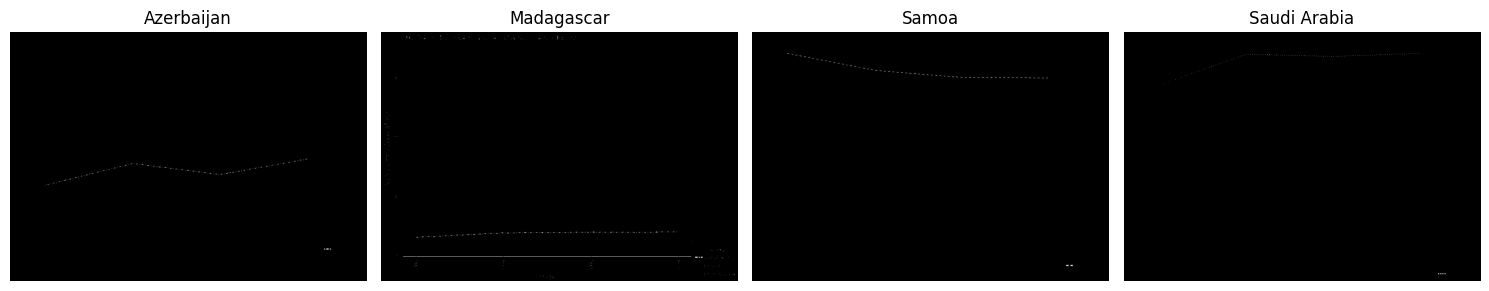

In [7]:
image_num = 20674
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

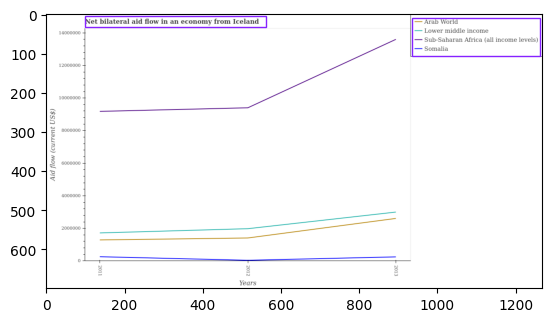

935 9
99 3


<Figure size 640x480 with 0 Axes>

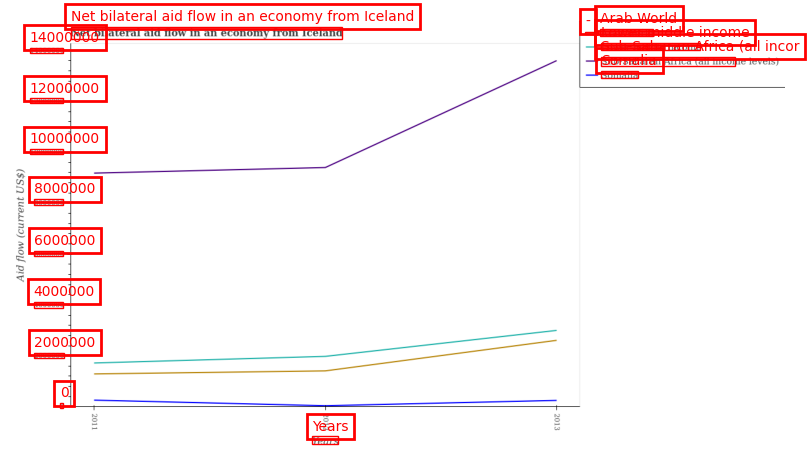

LEGEND ITEM Arab World
LEGEND ITEM Lower middle income
LEGEND ITEM Sub-Saharan Africa (all incor
LEGEND ITEM Somalia


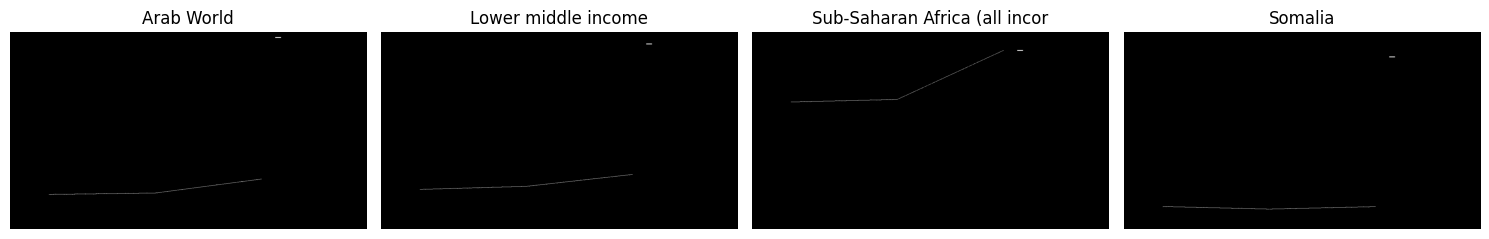

In [8]:
image_num = 19764
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

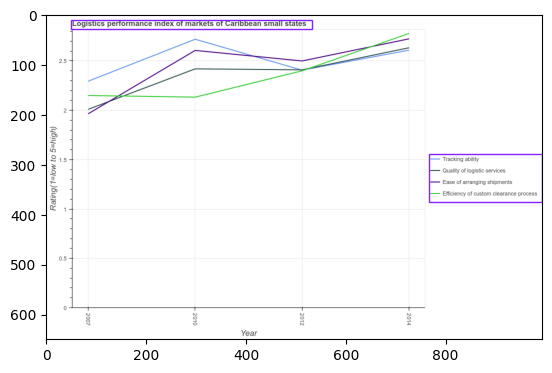

766 279
50 10


<Figure size 640x480 with 0 Axes>

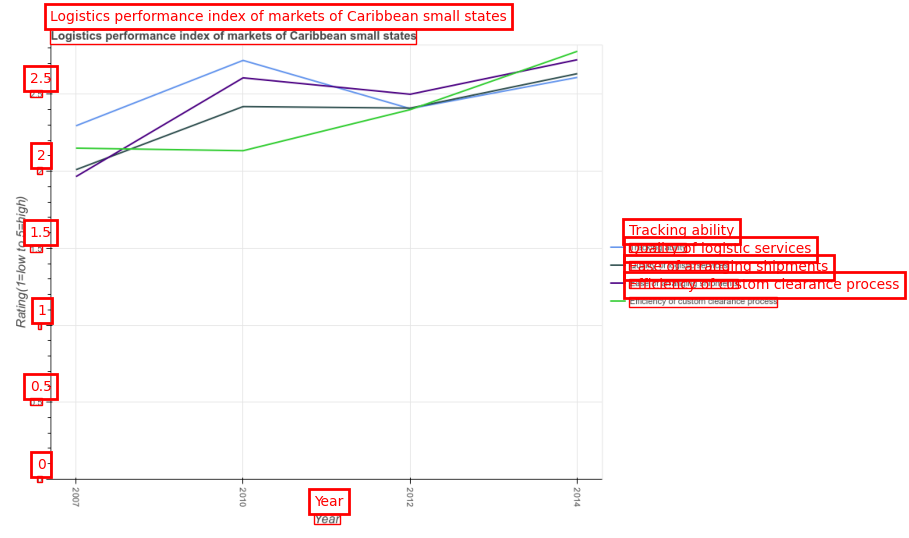

LEGEND ITEM Tracking ability
LEGEND ITEM Quality of logistic services
LEGEND ITEM Ease of arranging shipments
LEGEND ITEM Efficiency of custom clearance process


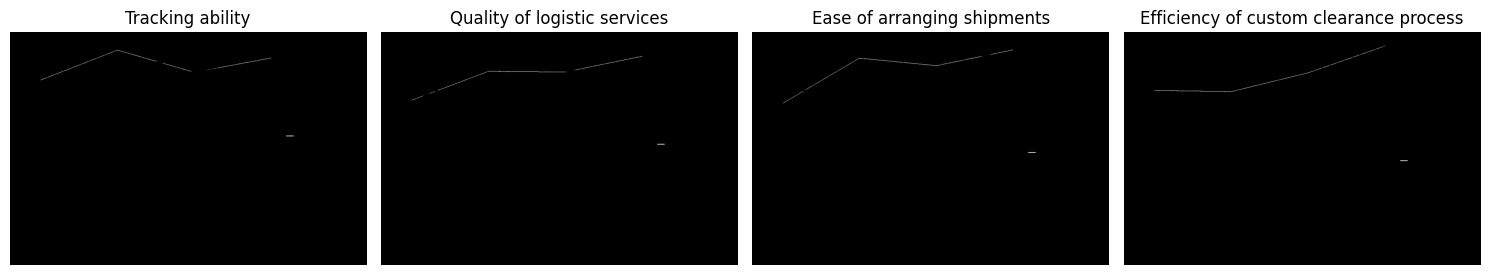

In [9]:
image_num = 19933
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

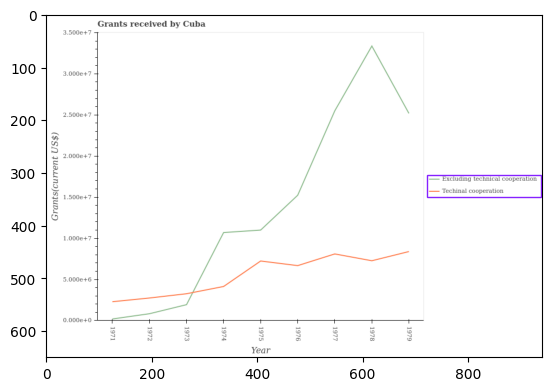

722 304


<Figure size 640x480 with 0 Axes>

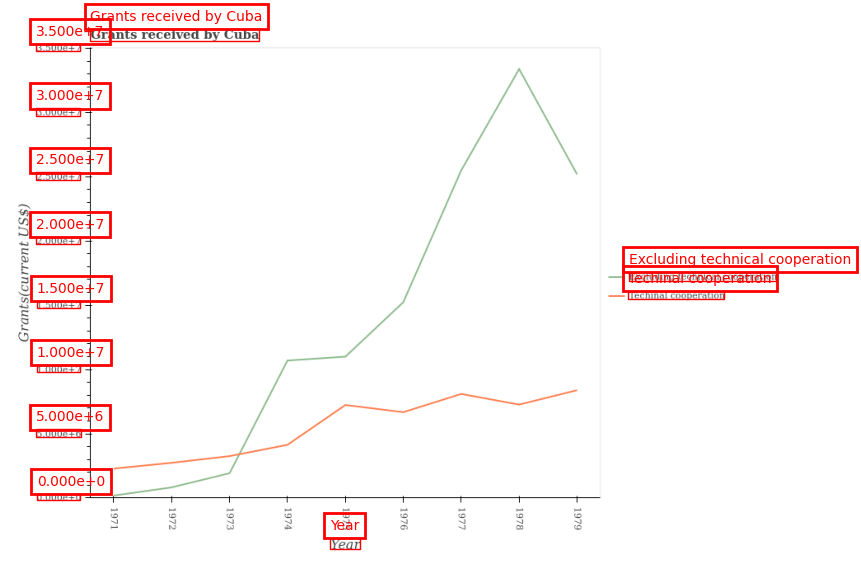

LEGEND ITEM Excluding technical cooperation
LEGEND ITEM Techinal cooperation


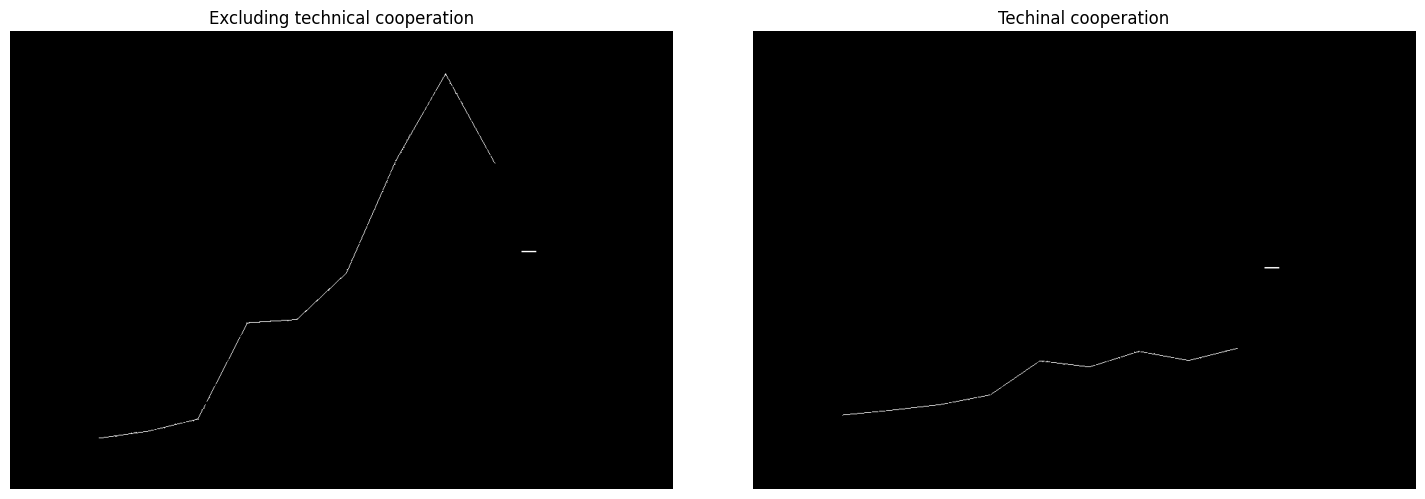

In [10]:
image_num = 17074
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

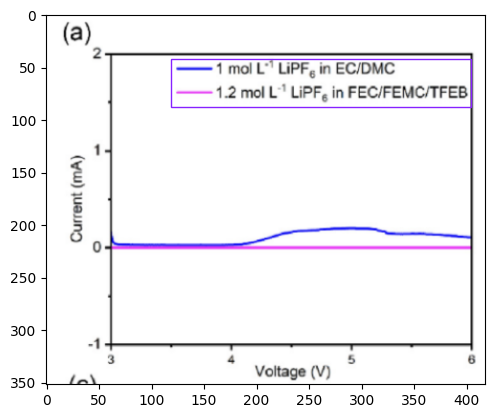

118 42


<Figure size 640x480 with 0 Axes>

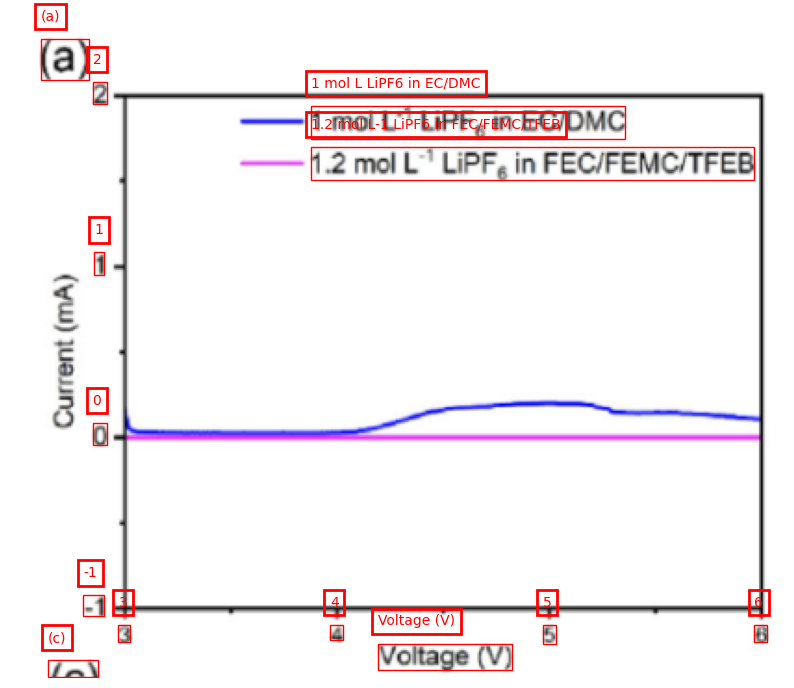

LEGEND ITEM 1 mol L LiPF6 in EC/DMC
LEGEND ITEM 1.2 mol L-1 LiPF6 in FEC/FEMC/TFEB


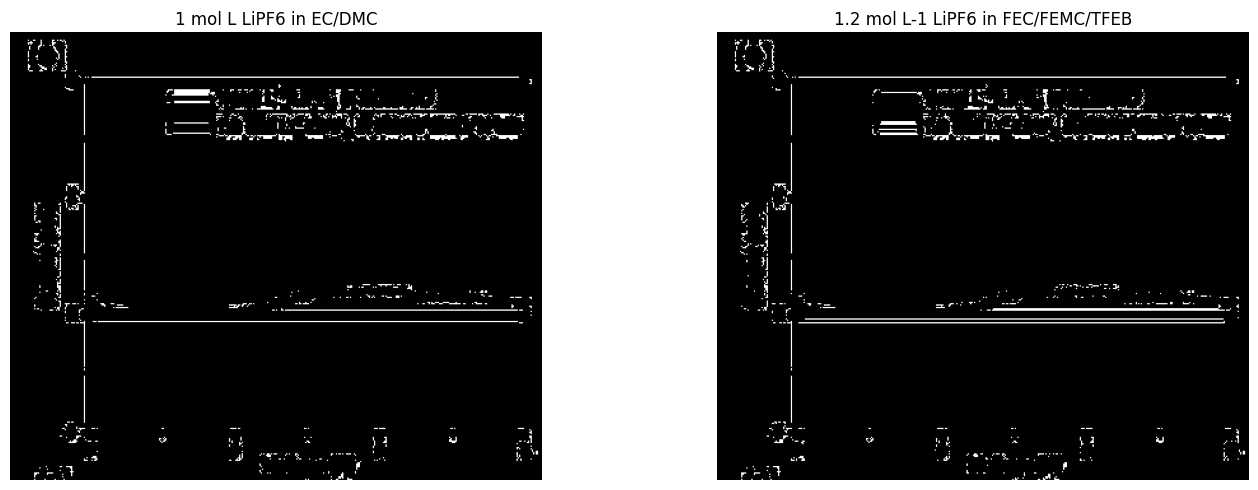

In [11]:
image_num = 1
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

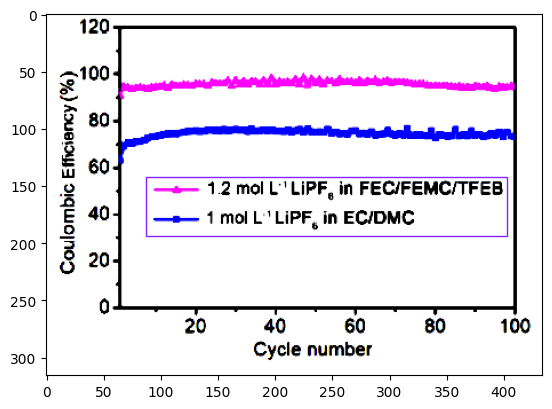

87 142


<Figure size 640x480 with 0 Axes>

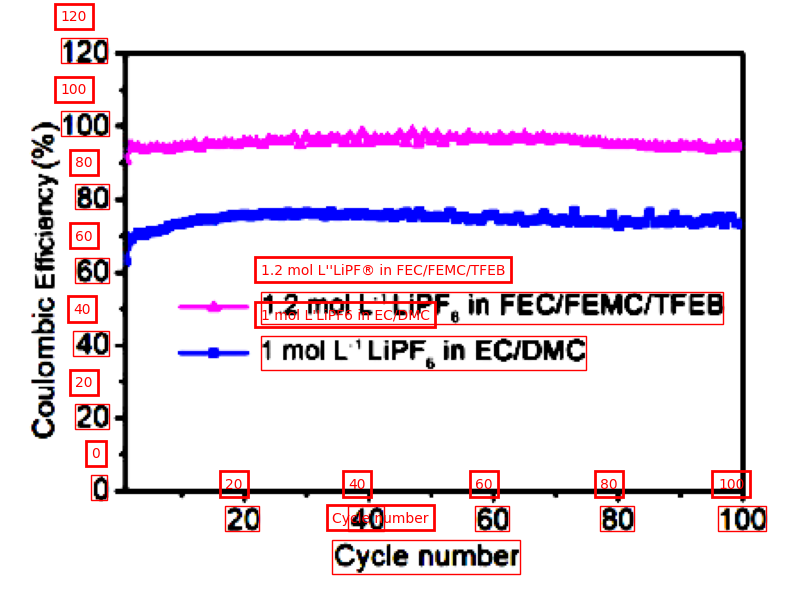

LEGEND ITEM 1.2 mol L''LiPF® in FEC/FEMC/TFEB
LEGEND ITEM 1 mol L'LiPF6 in EC/DMC


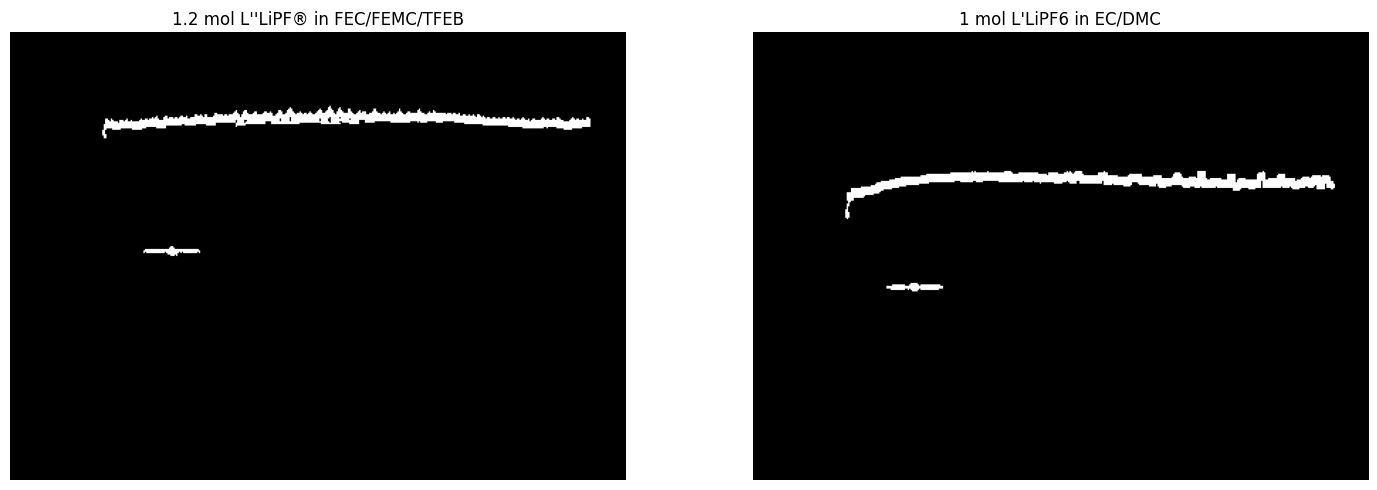

In [12]:
image_num = 5
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

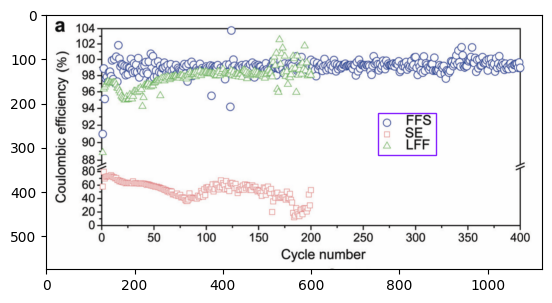

752 221


<Figure size 640x480 with 0 Axes>

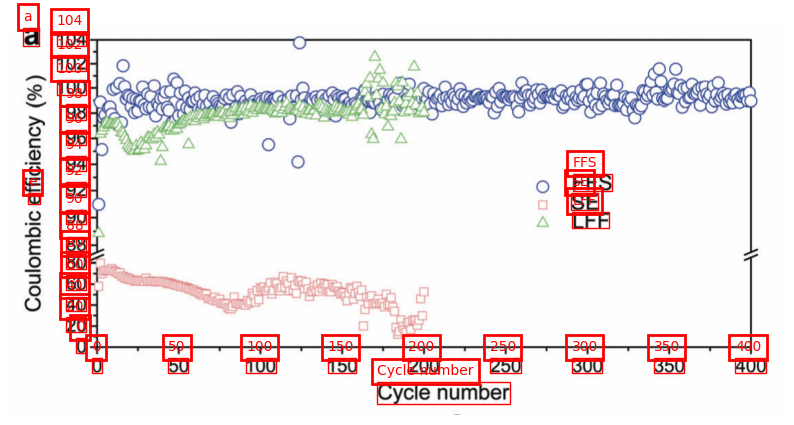

LEGEND ITEM FFS
LEGEND ITEM SE
LEGEND ITEM LFF


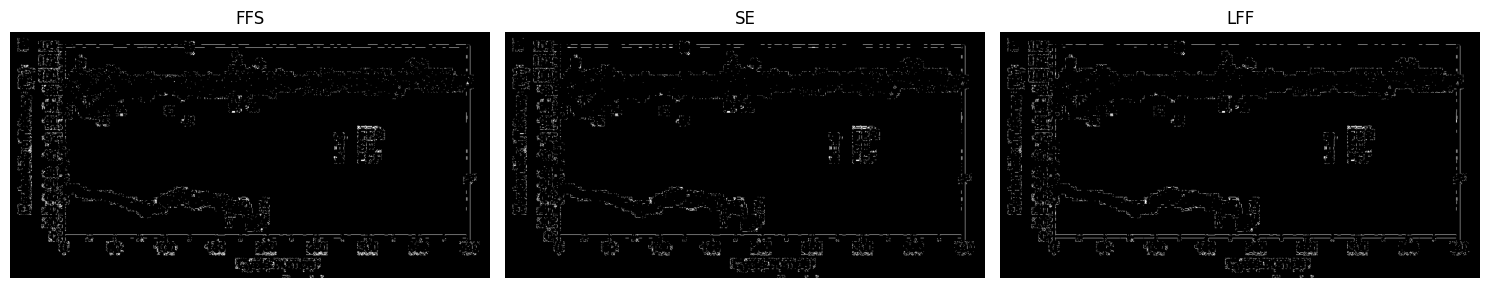

In [13]:
image_num = 7
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

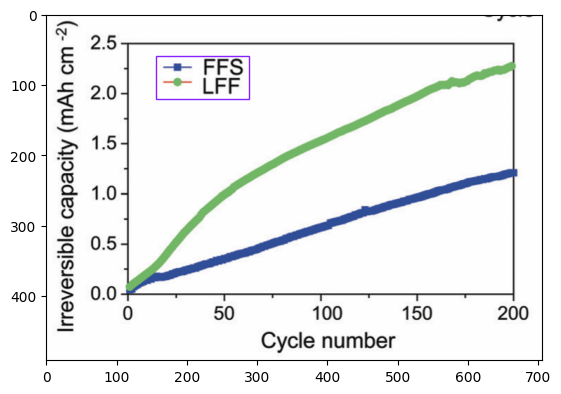

156 59


<Figure size 640x480 with 0 Axes>

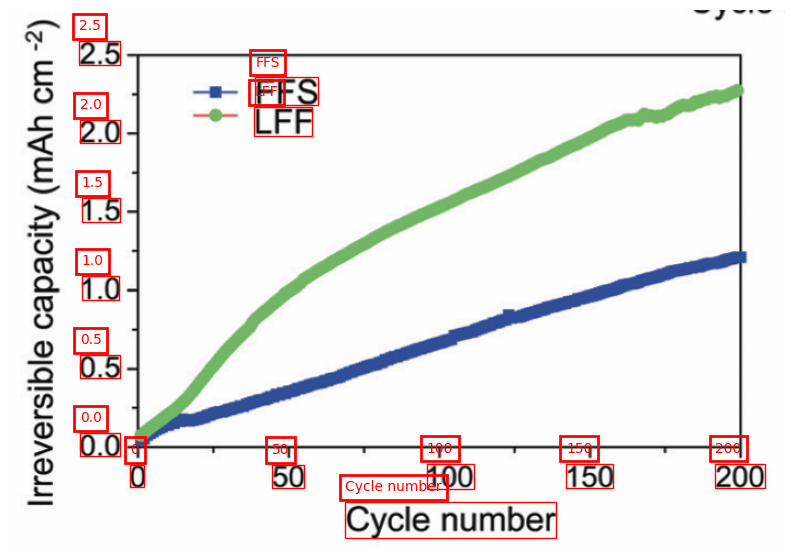

LEGEND ITEM FFS
LEGEND ITEM LFF


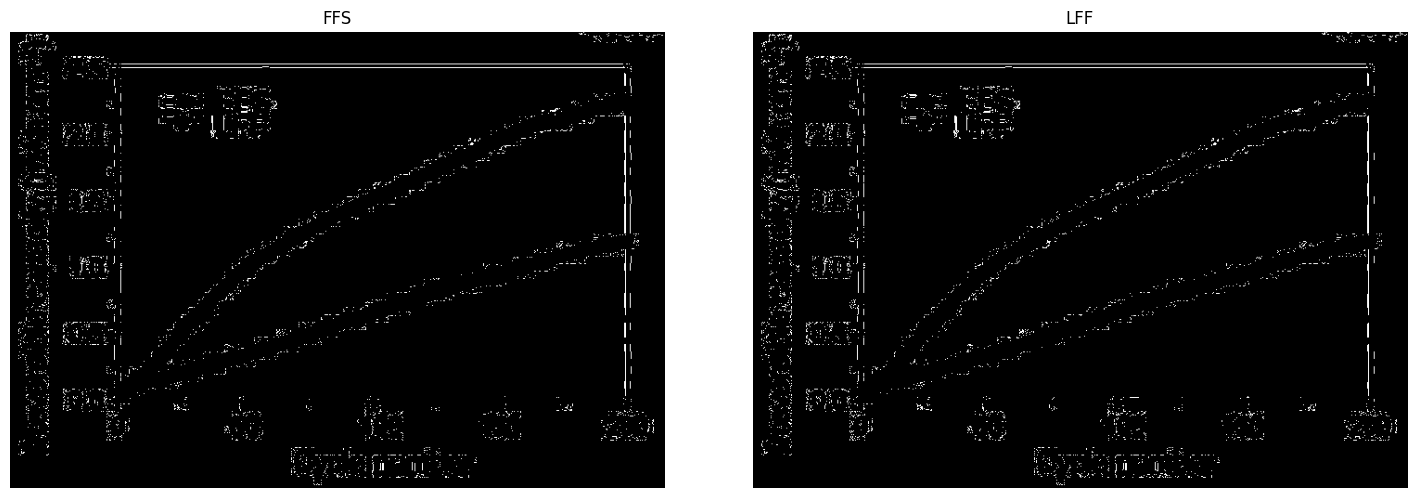

In [14]:
image_num = 8
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

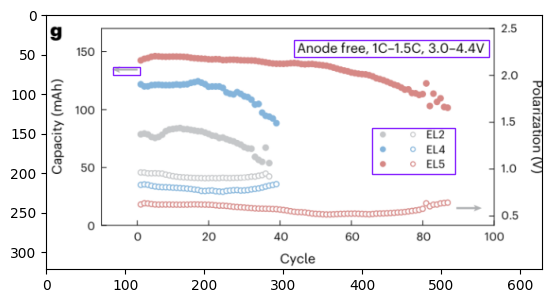

412 143
314 31
84 65


<Figure size 640x480 with 0 Axes>

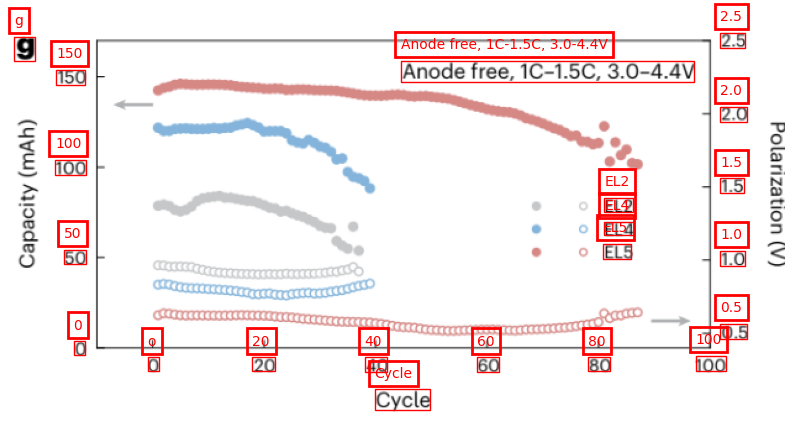

LEGEND ITEM EL2
LEGEND ITEM EL4
LEGEND ITEM EL5


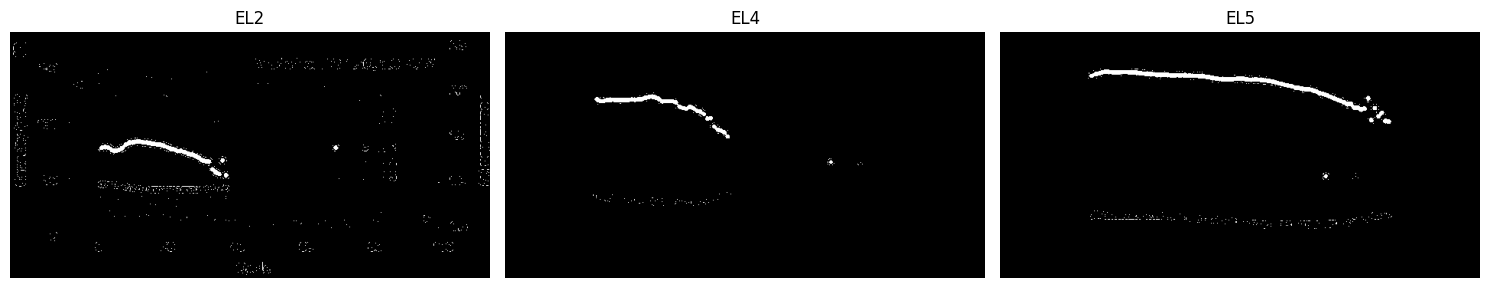

In [15]:
image_num = 15
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)

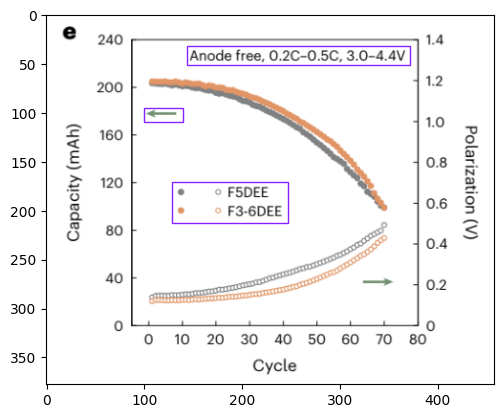

128 171
144 32
100 95


<Figure size 640x480 with 0 Axes>

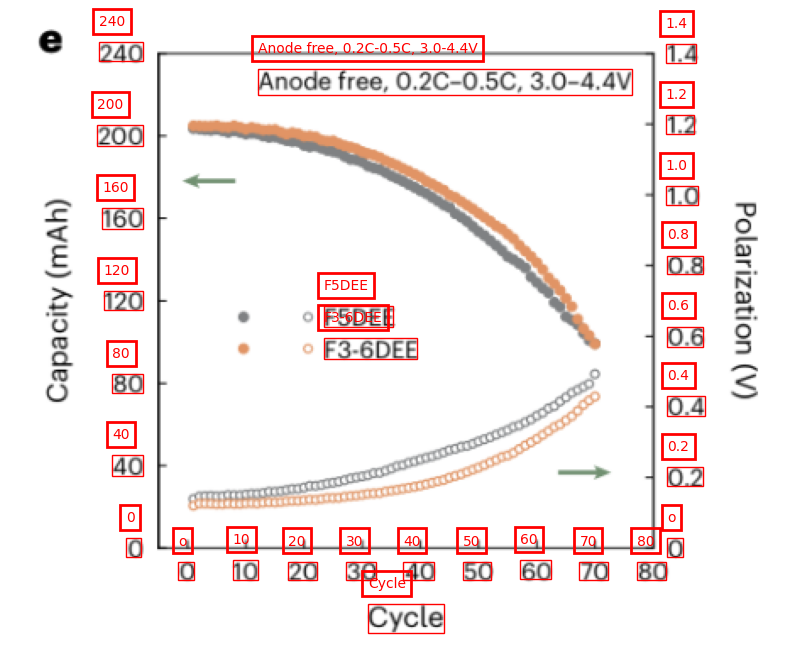

LEGEND ITEM F5DEE
LEGEND ITEM F3-6DEE


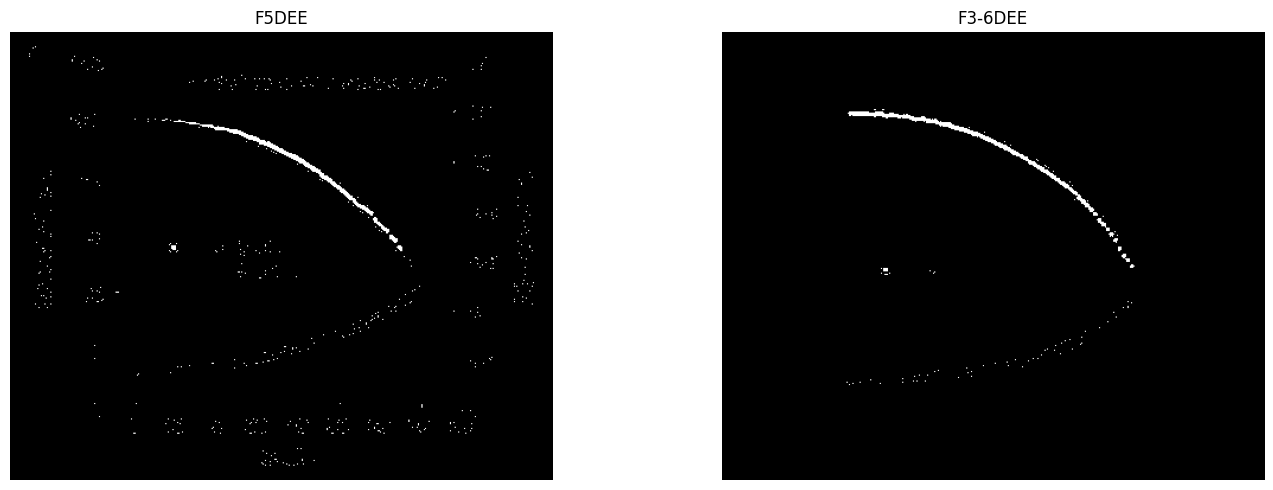

In [16]:
image_num = 19
image_name = '../plot_images/' + str(image_num) + '.png'

result = model.predict(image_name, confidence=40, overlap=30)
result.plot()

final = result.json()

if final:
    if "predictions" in final.keys():
        final = final["predictions"]
        for classification in final:
            x_min = int(classification['x'] - classification['width']/2)
            x_max = int(classification['x'] + classification['width']/2) + 1
            y_min = int(classification['y'] - classification['height']/2)
            y_max = int(classification['y'] + classification['height']/2) + 1

            print(x_min, y_min)

legend_box = final[0]

legend_to_mask(image_num, legend_box)